In [668]:
import nltk
from nltk.corpus import stopwords
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')

#For K means
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#For FastText

from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
import re

In [669]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [670]:
stop = stopwords.words('english')

In [657]:
df = pd.read_csv("C:\\Users\\prajw\\Zendesk\\zendesk_challenge.tsv",'\t')
df

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,Q1,how are glacier caves formed?,D1,Glacier cave,D1-0,A partly submerged glacier cave on Perito More...,0
1,Q1,how are glacier caves formed?,D1,Glacier cave,D1-1,The ice facade is approximately 60 m high,0
2,Q1,how are glacier caves formed?,D1,Glacier cave,D1-2,Ice formations in the Titlis glacier cave,0
3,Q1,how are glacier caves formed?,D1,Glacier cave,D1-3,A glacier cave is a cave formed within the ice...,1
4,Q1,how are glacier caves formed?,D1,Glacier cave,D1-4,"Glacier caves are often called ice caves , but...",0
5,Q2,How are the directions of the velocity and for...,D2,Circular motion,D2-0,"In physics , circular motion is a movement of ...",0
6,Q2,How are the directions of the velocity and for...,D2,Circular motion,D2-1,"It can be uniform, with constant angular rate ...",0
7,Q2,How are the directions of the velocity and for...,D2,Circular motion,D2-2,The rotation around a fixed axis of a three-di...,0
8,Q2,How are the directions of the velocity and for...,D2,Circular motion,D2-3,The equations of motion describe the movement ...,0
9,Q2,How are the directions of the velocity and for...,D2,Circular motion,D2-4,Examples of circular motion include: an artifi...,0


# Analysis

## 1. How many labeled answers does each question have?

In [639]:
# Count number of sentences per QuestionID (in effect per document) where label = 1
stat1 = df.groupby('QuestionID')['Label'].apply(lambda x : (x==1).sum()).reset_index(name='count')

In [620]:
# Sort the values based on count
stat1 = stat1.sort_values('count')
print(stat1)
# Check how many questions have how many sentences in that topic
# Count number of questions that have 1,2,3,4,5,6,7 answer sentences
stat1_p = stat1.groupby('count')['QuestionID'].count().reset_index(name='num_q')
stat1_p

     QuestionID  count
1058      Q2355      0
954       Q2223      0
953       Q2222      0
1650       Q396      0
951       Q2220      0
950       Q2219      0
949       Q2218      0
1652       Q399      0
946       Q2213      0
945       Q2212      0
944       Q2211      0
943       Q2210      0
1653        Q40      0
1654       Q400      0
1655       Q401      0
939       Q2206      0
1657       Q403      0
1658       Q405      0
955       Q2224      0
935         Q22      0
956       Q2225      0
1649       Q395      0
979        Q226      0
978       Q2258      0
1637       Q375      0
974       Q2252      0
973       Q2251      0
1639       Q378      0
1640       Q379      0
969       Q2247      0
...         ...    ...
1171      Q2504      2
575       Q1738      2
1692       Q450      2
253       Q1322      2
584       Q1751      2
26        Q1026      3
1628       Q366      3
1758       Q537      3
473         Q16      3
782       Q2012      3
1007      Q2295      3
171       Q

,count,num_q
0,0,1245
1,1,744
2,2,103
3,3,20
4,4,1
5,5,1
6,6,1
7,7,2


Text(0.5, 1.0, 'Distribution of questions based on number of answers')

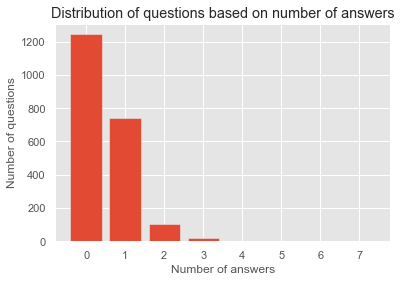

In [621]:
plt.bar(stat1_p['count'],stat1_p['num_q'], align='center')
plt.xlabel('Number of answers')
plt.ylabel('Number of questions')
plt.title('Distribution of questions based on number of answers')

## 2. How much information about each document do we have?

In [435]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

In [523]:
stat2 = df.groupby(['DocumentID','DocumentTitle'])['Sentence'].count().reset_index(name='Number of Sentences')
statp = stat2
stat2 = stat2.sort_values('Number of Sentences')
stat2

,DocumentID,DocumentTitle,Number of Sentences
721,D1912,Vas deferens,1
1612,D524,Paul Bragg,1
1280,D2625,List of One Life to Live characters,1
757,D1955,Paul Avery,1
1672,D601,Master Sergeant,1
1265,D2605,JLA (comic book),1
725,D1917,Hot flash,1
1262,D260,1907,1
1246,D2582,List of critics of the New Deal,1
761,D1960,Giovanni Schiaparelli,1


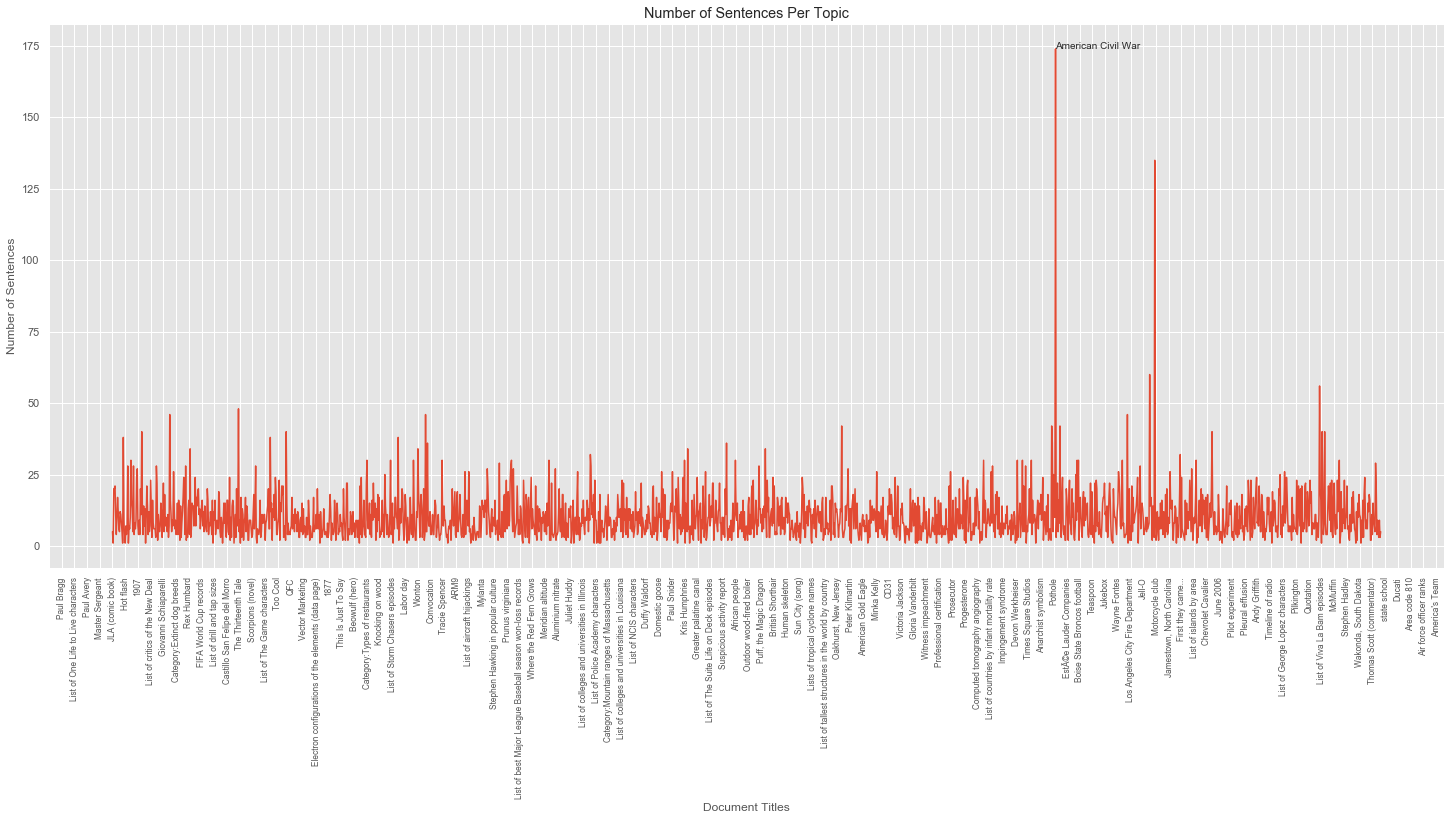

In [598]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,1,1)
ax.set_xticklabels(stat2['DocumentTitle'].values,fontsize = 'small',rotation=90)
ax.annotate(statp.iloc[statp['Number of Sentences'].idxmax()]['DocumentTitle'],xy=(statp['Number of Sentences'].idxmax(),statp.iloc[statp['Number of Sentences'].idxmax()]['Number of Sentences']))

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.set_xlabel('Document Titles')
ax.set_ylabel('Number of Sentences')
ax.set_title('Number of Sentences Per Topic')

plt.plot(statp['DocumentTitle'],statp['Number of Sentences'])

In [433]:
statp.iloc[statp['Number of Sentences'].idxmax()]['DocumentTitle']

'American Civil War'

## 3. Answered v/s Unanswered Questions

In [451]:
sum(stat3.iloc[1:,1])

872

   Unanswered  Answered
0        1245       872


Text(0, 0.5, 'Number of questions')

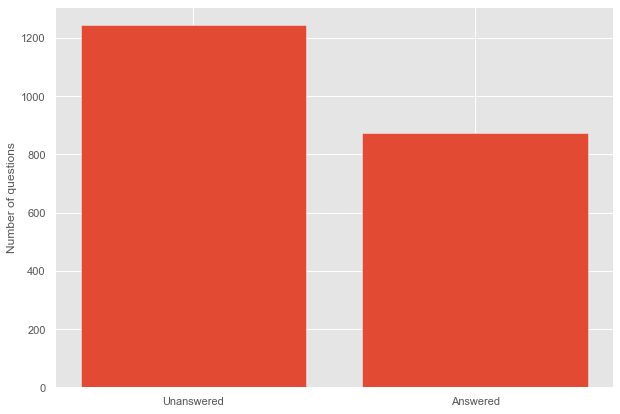

In [613]:
stat3 = df.groupby('QuestionID')['Label'].apply(lambda x : (x==1).sum()).reset_index(name='count')
stat3 = stat1.sort_values('count')
stat3 = stat1.groupby('count')['QuestionID'].count().reset_index(name='num_q')
stat3_p = pd.DataFrame([[stat3.iloc[0,1],stat3.iloc[1:,1].sum()]],columns=['Unanswered','Answered'])
print(stat3_p)

fig3 = plt.figure(figsize=(10,7))
ax3 = fig3.add_subplot(1,1,1)
plt.bar(stat3_p.columns,stat3_p.iloc[0,:])
plt.ylabel('Number of questions')

## 4. Distribution of questions based on number of sentences in topic

Text(0.5, 1.0, 'Distribution of questions based on number of sentences in that topic')

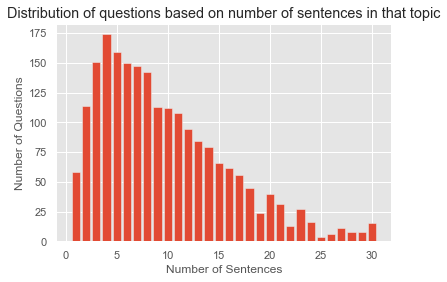

In [625]:
# Count number of sentences per QuestionID (in effect per document) 
stat4 = df.groupby('QuestionID')['Label'].apply(lambda x : (x==1).count()).reset_index(name='count')

# Sort the values based on count
stat4 = stat4.sort_values('count')

# Check how many questions have how many sentences in that topic
# Count number of questions that have 1,2,3,4,5,6,7 answer sentences
stat4_p = stat4.groupby('count')['QuestionID'].count().reset_index(name='num_q')

plt.bar(stat4_p['count'],stat4_p['num_q'], align='center')
plt.xlabel('Number of Sentences')
plt.ylabel('Number of Questions')
plt.title('Distribution of questions based on number of sentences in that topic')

# Unsupervised Clustering to Find Groups

## Setup for K - means

In [645]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [644]:
# General function to plot the SSE with different number of clusters to choose the best value for k

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
    
# General function to plot the PCA and TSNE to visualize the clusters in a 2D space

def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=500, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

# K Means on answer sentences

In [643]:
# setup tfidf vectorizer to encode text data to numbers so k means can process with it
# This tokenizes and removes stop words from the training dataset

tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)

tfidf.fit(df.Sentence)
text = tfidf.transform(df.Sentence)

Below is the SSE plot to look for an elbow point after which the SSE starts to become stable. Typically choose this plot as the value for k = num of clusters as it will give optimum separation.
<br>
Elbow point here is 16, hence choose num_clusters = 16

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters


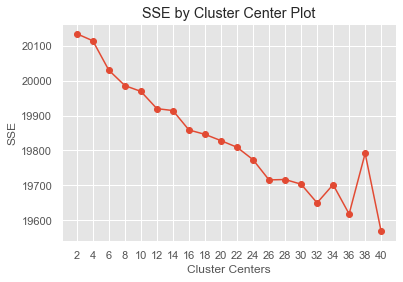

In [649]:
find_optimal_clusters(text, 40)

In [671]:
# Get cluster labels
clusters_sentence = MiniBatchKMeans(n_clusters=16, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

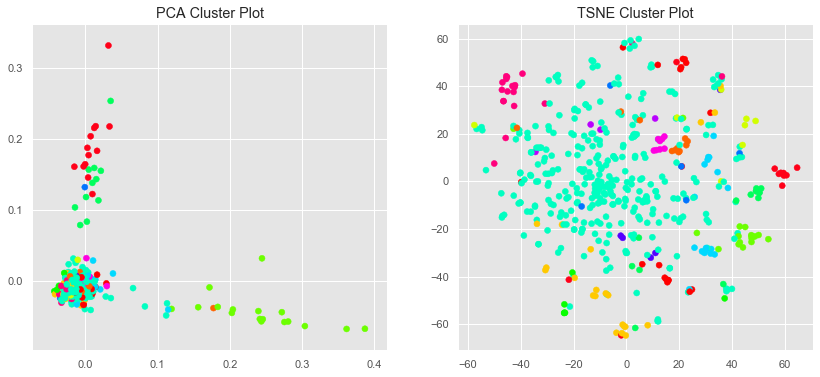

In [672]:
plot_tsne_pca(text, clusters_sentence)

In [673]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters_sentence, tfidf.get_feature_names(), 10)


Cluster 0
state,new,metropolitan,country,county,language,largest,population,area,city

Cluster 1
team,division,park,nfl,major,association,american,football,league,national

Cluster 2
written,television,music,series,new,american,album,song,released,film

Cluster 3
actor,singer,better,series,commonly,stage,born,american,best,known

Cluster 4
government,american,state,federal,constitution,kingdom,canada,president,united,states

Cluster 5
golden,nominated,received,grammy,academy,selling,won,awards,award,best

Cluster 6
estimated,sold,according,people,largest,million,census,population,2010,world

Cluster 7
life,include,common,series,form,usually,state,called,use,time

Cluster 8
american,ago,age,old,later,election,vice,elected,president,years

Cluster 9
variety,animals,various,range,wide,million,history,use,number,including

Cluster 10
decisions,administration,drug,owed,federal,substances,collection,talent,government,agencies

Cluster 11
year,soldiers,million,deaths,years,people,100,10,esti

In [674]:
kmeans = MiniBatchKMeans(n_clusters=5, init_size=1024, batch_size=2048, random_state=20).fit(text)
centers_a = kmeans.cluster_centers_
centers_a

array([[0.00021068, 0.0033223 , 0.00018349, ..., 0.00045643, 0.00018673,
        0.00017525],
       [0.        , 0.00015567, 0.        , ..., 0.0004686 , 0.        ,
        0.00049794],
       [0.00058594, 0.00463883, 0.        , ..., 0.00745022, 0.00096261,
        0.00134713],
       [0.        , 0.00259504, 0.        , ..., 0.00059838, 0.0002913 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# K Means on Questions

In [646]:
# Setup tfidf vectorizer
tfidf_q = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf_q.fit(df.Question)
text_question = tfidf_q.transform(df.Question)

Elbow point here is 14. Hence choosing num of clusters = 14

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


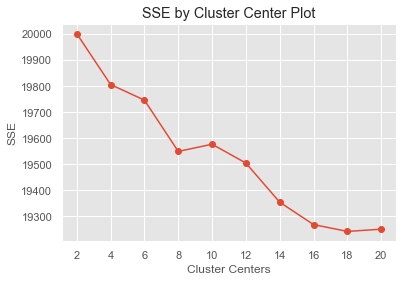

In [635]:
find_optimal_clusters(text_question, 20)

## 14 Clusters


Cluster 0
ww1,east,originate,wine,mexico,dubai,turkey,country

Cluster 1
gaga,judas,deep,internet,disease,county,born,john

Cluster 2
health,sic,come,start,stand,work,mean,does

Cluster 3
resigns,fdr,washington,roosevelt,theodore,nixon,elected,president

Cluster 4
new,trogan,tennessee,different,triggered,civil,war,state

Cluster 5
ezekiel,f15s,expos,zx3,did,begin,hurricane,katrina

Cluster 6
muscles,does,kidneys,water,skin,lungs,body,human

Cluster 7
states,king,daylight,job,macbeth,florida,tampa,time

Cluster 8
exxon,eye,eyes,expectations,zx3,older,stonehedge,pyramid

Cluster 9
daughter,crime,pedophile,league,destroyed,towers,twin,old

Cluster 10
begin,year,end,civil,start,war,die,did

Cluster 11
married,happened,played,america,vitamin,people,countries,used

Cluster 12
start,end,people,did,cup,started,war,world

Cluster 13
exxon,eye,eyes,ezekiel,expected,zx3,differences,genetic


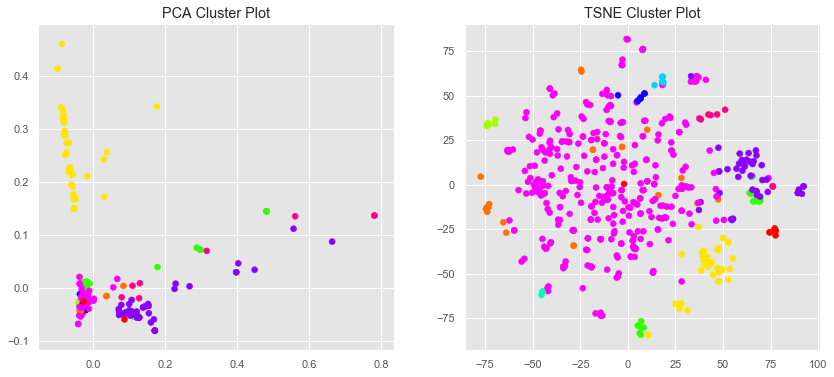

In [648]:
clusters_questions = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text_question)
plot_tsne_pca(text_question, clusters_questions)
get_top_keywords(text_question, clusters_questions, tfidf_q.get_feature_names(), 8)

In [553]:
! pip install --user --upgrade tensorflow

  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl
  Stored in directory: C:\Users\prajw\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\prajw\AppData\Local\pip\Cache\wheels\8e\28\49\fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Stored in directory: C:\Users\prajw\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built termcolor absl-py gast


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [550]:
! pip install keras

# Similarity using FastText Embedding

## Preparing the data to train the fasttext model. 

### Step 1 : Sentence tokenize

In [660]:
df_selected = df[['Sentence']]
answers = []
for row in df_selected.Sentence:
    answers.extend(sent_tokenize(row))

In [567]:
answers

['A partly submerged glacier cave on Perito Moreno Glacier .',
 'The ice facade is approximately 60 m high',
 'Ice formations in the Titlis glacier cave',
 'A glacier cave is a cave formed within the ice of a glacier .',
 'Glacier caves are often called ice caves , but this term is properly used to describe bedrock caves that contain year-round ice.',
 'In physics , circular motion is a movement of an object along the circumference of a circle or rotation along a circular path.',
 'It can be uniform, with constant angular rate of rotation (and constant speed), or non-uniform with a changing rate of rotation.',
 'The rotation around a fixed axis of a three-dimensional body involves circular motion of its parts.',
 'The equations of motion describe the movement of the center of mass of a body.',
 'Examples of circular motion include: an artificial satellite orbiting the Earth at constant height, a stone which is tied to a rope and is being swung in circles, a car turning through a curve 

### Step 2 : Pre-process the sentence tokenized corpus

In [570]:
stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [571]:
final_corpus = [preprocess_text(sentence) for sentence in answers if sentence.strip() !='']

word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

In [578]:
word_tokenized_corpus[100:120]

[['tested', 'nasa', 'stennis', 'space', 'center'],
 ['nearly',
  'transparent',
  'exhaust',
  'engine',
  'exhaust',
  'mostly',
  'superheated',
  'steam',
  'water',
  'vapor',
  'propellant',
  'hydrogen',
  'oxygen'],
 ['viking', 'rocket', 'engine'],
 ['rocket',
  'engine',
  'simply',
  'rocket',
  'engine',
  'stored',
  'propellant',
  'mass',
  'forming',
  'high',
  'speed',
  'propulsive'],
 ['rocket',
  'engine',
  'reaction',
  'engine',
  'obtain',
  'thrust',
  'accordance',
  'newton',
  'third'],
 ['since',
  'need',
  'external',
  'material',
  'form',
  'rocket',
  'engine',
  'used',
  'spacecraft',
  'propulsion',
  'well',
  'terrestrial',
  'missile'],
 ['rocket',
  'engine',
  'internal',
  'combustion',
  'engine',
  'although',
  'combusting',
  'form',
  'also',
  'exist'],
 ['rocket',
  'engine',
  'group',
  'highest',
  'exhaust',
  'velocity',
  'lightest',
  'least',
  'propellant',
  'efficient',
  'type',
  'engine'],
 ['baby',
  'time',
  'song',
  '

### Step 3 : Create FastText Model 
Define Hyperparameters for generating FastText model

In [574]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2
sg = 1  # CBOW (0) or Skip-gram (1) model

In [575]:
%%time
model_fast = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

Wall time: 3min 21s


In [577]:
print(model_fast.wv['glacier'])

[ 0.08257806 -0.33252874 -0.01246511 -0.08229645 -0.30505246 -0.20733033
 -0.4106529   0.38146254 -0.841313    0.79596937  0.08525316  0.3166199
  0.36758062  0.516983    0.32087043  0.79674804  0.719645   -0.36741847
 -1.3805462   1.1505257  -0.7078468   0.3431619  -0.79041094 -0.7209554
 -1.1942987   0.9793438   0.37926036  0.07939611  0.6853724  -1.422003
 -0.63789856 -0.7850543  -0.06538683 -0.02795319 -0.575734    0.7063473
  0.12236305  2.0629869  -0.11522884 -0.35089496  0.1921447   0.7629087
  0.4391507   0.51897776  0.6373384   1.8882179  -0.70668936  0.07691275
  0.18059242 -1.0186968  -0.0196673   0.7427292  -0.5591453  -0.3953173
 -0.5457188   0.9388678   0.04965101  0.35090616 -0.7325865  -0.16884738]


### Visualizing in 2D space using PCA

In [664]:
semantically_similar_words = {words: [item[0] for item in model_fast.wv.most_similar([words], topn=10)]
                  for words in ['richard', 'nixon', 'president']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

richard:['nixon', 'michael', 'sinatra', 'john', 'harris', 'outgoing', 'hurt', 'julie', 'president', 'harding']
nixon:['kennedy', 'watergate', 'president', 'presidential', 'republican', 'democratic', 'scandal', 'vice', 'richard', 'incumbent']
president:['vice', 'elected', 'resign', 'presidential', 'roosevelt', 'senator', 'resigned', 'resignation', 'elect', 'election']


In [665]:
all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['richard', 'nixon', 'michael', 'sinatra', 'john', 'harris', 'outgoing', 'hurt', 'julie', 'president', 'harding', 'nixon', 'kennedy', 'watergate', 'president', 'presidential', 'republican', 'democratic', 'scandal', 'vice', 'richard', 'incumbent', 'president', 'vice', 'elected', 'resign', 'presidential', 'roosevelt', 'senator', 'resigned', 'resignation', 'elect', 'election']
<class 'list'>
33


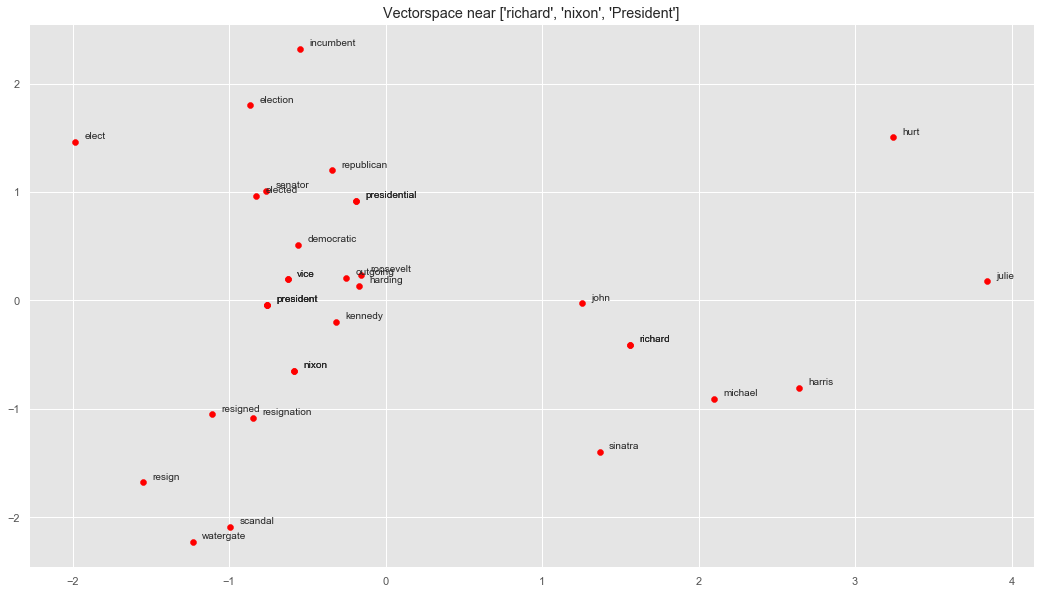

In [667]:
word_vectors = model_fast.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')
plt.title("Vectorspace near ['richard', 'nixon', 'President']")
for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')